In [224]:
from scipy import stats
from scipy.stats import qmc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [225]:
# https://docs.scipy.org/doc/scipy/reference/stats.qmc.html
methods = [qmc.LatinHypercube, qmc.Sobol, qmc.Halton]
m_names = ['Random', 'Grid', 'Latin Hypercube', 'Sobol', 'Halton']

In [226]:
def rand_samples(dim, size):
    rand = np.random.rand(size, dim)
    samples = [rand]
    discr = [qmc.discrepancy(rand)]
    grid_size = int(np.ceil(size**(1/dim)))
    grid_linspace = dict()
    for c in range(dim):
        grid_linspace[c] = np.linspace(0, 1, grid_size)
    grid_lin = np.meshgrid(*grid_linspace.values())
    grid_vals = np.column_stack(([grid_lin[i].flatten() for i in range(dim)]))
    samples.append(grid_vals)
    discr.append(qmc.discrepancy(grid_vals))
    for mt in methods:
        m = mt(d=dim)
        q_val = m.random(n=size)
        samples.append(q_val)
        discr.append(qmc.discrepancy(q_val))
    return samples, discr

In [ ]:
# Plotting
samples, discr = rand_samples(2, 2**8)
_, axes = plt.subplots(len(m_names), figsize=(5, 18), tight_layout=True)
for i, samp in enumerate(samples):
    axes[i].set_title(m_names[i])
    axes[i].scatter(samp[:, 0], samp[:, 1], c='orange')
plt.show()

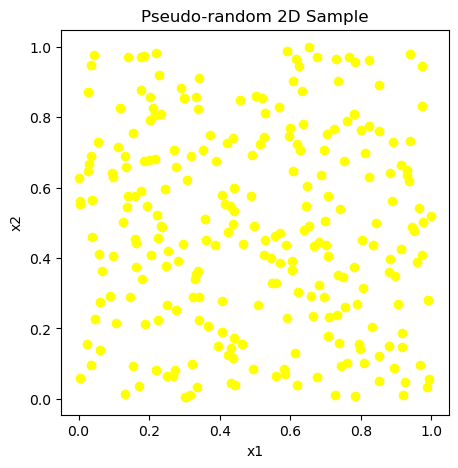

In [297]:
samples, discr = rand_samples(2, 2**8)
plt.figure(figsize=(5,5))
plt.scatter(samples[0][:, 0], samples[0][:, 1], c='yellow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Pseudo-random 2D Sample')
plt.show()

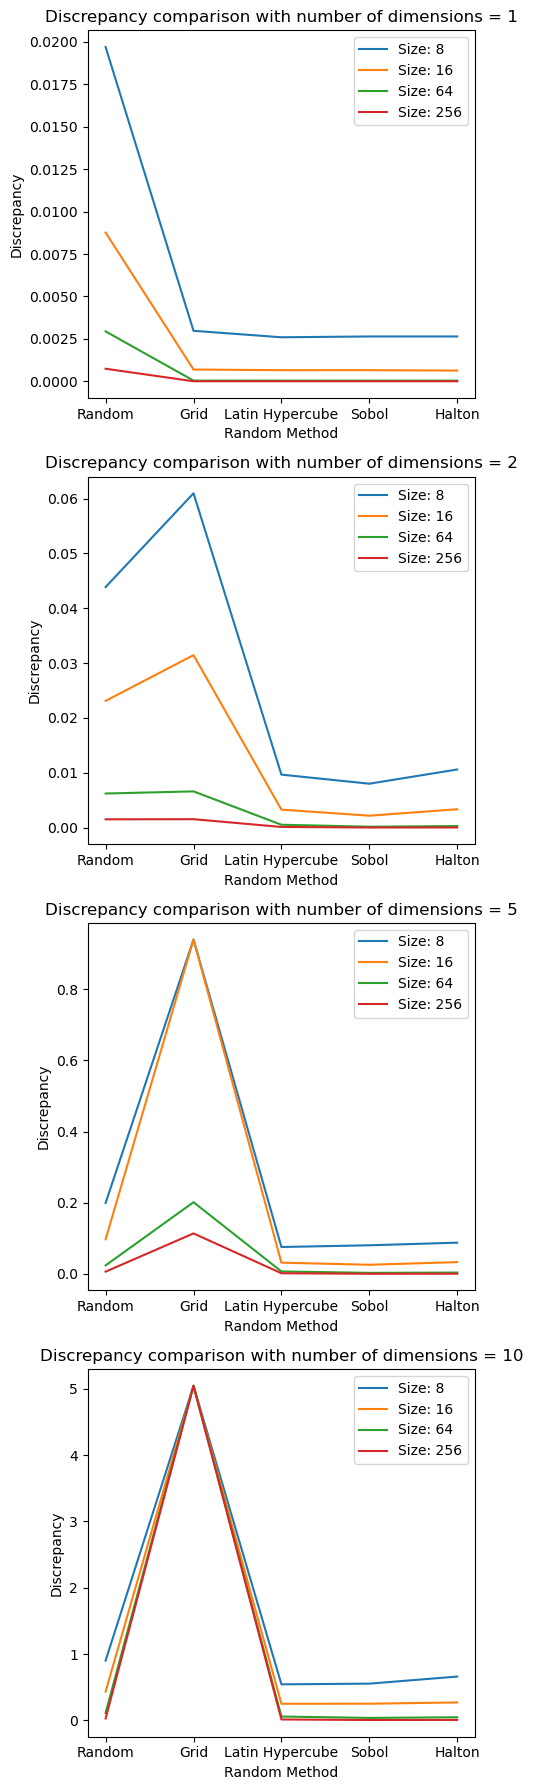

In [250]:
dims = [1, 2, 5, 10]
sizes = [2**3, 2**4, 2**6, 2**8]
_, axes = plt.subplots(len(sizes), figsize=(5, 18), tight_layout=False)
for c, dim in enumerate(dims):
    for size in sizes:
        discrs = list()
        for i in range(100):
            _, discr = rand_samples(dim, size)
            discrs.append(discr)
        axes[c].plot(np.mean(discrs, axis=0).tolist(), label=f'Size: {size}')
        axes[c].set_xticks(np.arange(len(m_names)), m_names)
    axes[c].set_title(f'Discrepancy comparison with number of dimensions = {dim}')
    axes[c].set_xlabel('Random Method')
    axes[c].set_ylabel('Discrepancy')
    axes[c].legend()
plt.show()

Text(0, 0.5, 'x2')

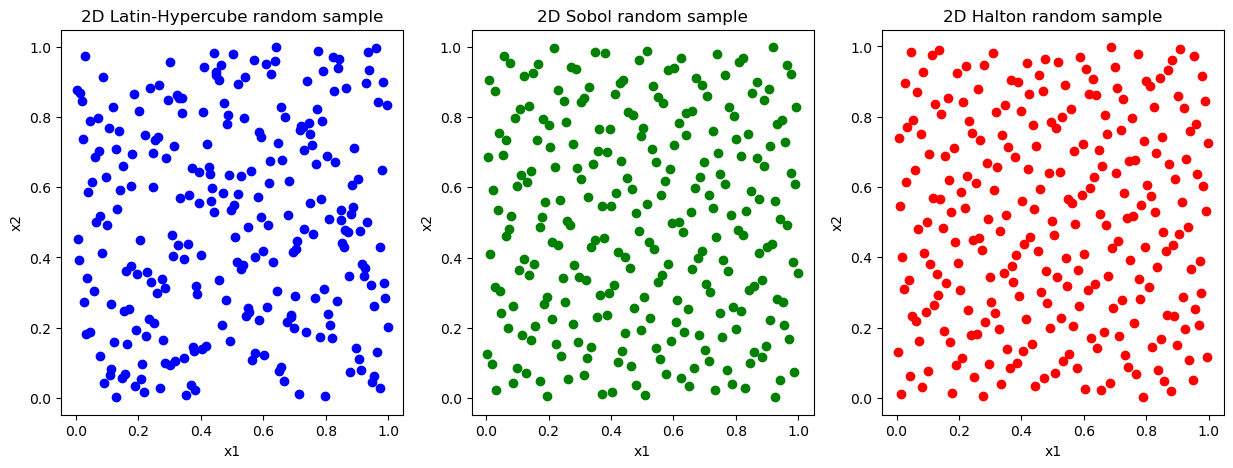

In [296]:
test1=qmc.LatinHypercube(2).random(256)
test2=qmc.Sobol(2, scramble=True).random(256)
test3=qmc.Halton(2, scramble=True).random(256)
_, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].scatter(test1[:,0], test1[:,1], c='blue')
axes[0].set_title("2D Latin-Hypercube random sample")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[1].scatter(test2[:,0], test2[:,1], c='green')
axes[1].set_title("2D Sobol random sample")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[2].scatter(test3[:,0], test3[:,1], c='red')
axes[2].set_title("2D Halton random sample")
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")

In [ ]:
import plotly.express as px
x=mod_opt[0].discrete_seq[:,0]
y=mod_opt[0].discrete_seq[:,1]
z=mod_opt[0].discrete_seq[:,2]
df = pd.DataFrame({'col_x':x, 'col_y':y, 'col_z':z})
fig = px.scatter_3d(df, x='col_x', y='col_y', z='col_z')
fig.show()